<a href="https://colab.research.google.com/github/daisysere/machine_learning/blob/main/Template_Tugas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Create a Neural Network Model for Image Classification

In [ ]:
# import libraries 
import tensorflow as tf 
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt
# utilities library
import cv2
import os

Tugas kalian di sini ya haha, ganti source dari datanya boleh apa aja asal jangan yang sama. Deadline-nya 2 Febuari! Masih lama kaan? semangaat.

In [ ]:
!wget https://github.com/iqbalbasyar/kickstart_gan/raw/main/jaffe.zip -q
!unzip -q jaffe.zip 

In [ ]:
data_path = 'jaffe' #nama folder dari path gambar yang kalian pake
data_dir_list = os.listdir(data_path)

In [ ]:
img_data_list=[]
img_label = []
label_map = {}
i = 0 

In [ ]:
# kasih label untuk setiap gambarnya
for dataset in data_dir_list:
    img_list=os.listdir(data_path+'/'+ dataset)
    label_map[i] = str(dataset)
    
    for img in img_list:
        img_label.append(i)
        input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
        input_img_resize=cv2.resize(input_img,(128,128))
        img_data_list.append(input_img_resize)
    i += 1

[Kalau mau baca baca lebih lanjut untuk normalisasi image](https://medium.com/@shoaibrashid/what-is-image-normalization-d8305bf328c0)

In [ ]:
# ubah data labelingnya jadi 
img_data = np.array(img_data_list)
img_data = img_data.astype('float')
img_data = img_data/255 #normalization, ubah range dari intensiti pixel
img_label = np.array(img_label)

def getlabel(id):
    return label_map[id]

**About this Data**: 

Japanese Female Facial Expression (JAFFE) dataset terdiri dari 183 gambar dari 10 different female modelsdengan 6 ekspresi. Datanya akan dinormalisasikan sehinga value-nya range antara 0 - 5

Value expression-nya:

|    | Expression   |
|---:|:-------------|
|  0 | HAPPY         |
|  1 | SURPRISE          |
|  2 | FEAR        |
|  3 | SAD     |
|  4 | ANGRY        |
|  5 | DISGUST      |

<details> <summary>Cite the author</summary>
Michael J. Lyons, Shigeru Akamatsu, Miyuki Kamachi, Jiro Gyoba. Coding Facial Expressions with Gabor Wavelets, 3rd IEEE International Conference on Automatic Face and Gesture Recognition, pp. 200-205 (1998). http://doi.org/10.1109/AFGR.1998.670949 Open access content available at: https://zenodo.org/record/3430156

</details>

In [ ]:
# dimensi data yang kita punya + labelnya
img_data.shape, img_label.shape

((183, 128, 128, 3), (183,))

Contoh ilustrasi image bewarna sebagai 3d array. 

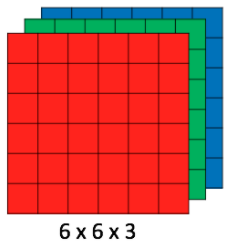

Visualisasi sample data:

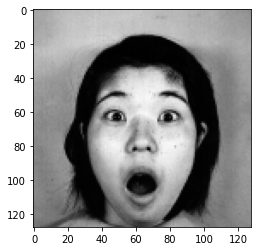

In [ ]:
i = 1
plt.imshow(img_data[i])

In [ ]:
print(f"label of the #{i} image is : {img_label[i]}")
print(f"which is translated into : {getlabel(img_label[i])}")

label of the #1 image is : 0
which is translated into : SURPRISE


## Data Split (Train Test Split)

This process of comparing the model performance on training data vs the performance of unseen (test) data is called **Cross Validation**.

Because we cannot easily generate new image and test it into the model, we are going to take several image from train data and use it as test data. 

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(img_data, img_label, test_size=0.1, random_state=0)

In [ ]:
print(f"The size of training sample : {x_train.shape}")
print(f"The size of test sample : {x_test.shape}")

The size of training sample : (164, 128, 128, 3)
The size of test sample : (19, 128, 128, 3)


___

## 2. Create the Model

Sekarang kita akan bangun convolutional layer ke model yang akan kita bangun. Btw kalo kalian mau experiment untuk coba layer layer/algoritma lain, feel free yaa!

In [ ]:
# Kalo kalian mau ulang training tanpa harus reset notebooknya, kalian bisa pake line ini, kalo kalian ga reset sessionnya, 
# Keras akan lanjutin epoch yang udah kalian apply

# tf.keras.backend.clear_session()

In [ ]:
model_cnn = keras.Sequential()

#input shapenya 128 128 3 sesuai dengan dimensi yang kita punya untuk imagenya
model_cnn.add(keras.layers.Conv2D(filters=16, kernel_size=(5,5), input_shape=(128,128,3), padding='same', activation="relu"))
model_cnn.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation="relu"))
model_cnn.add(keras.layers.MaxPooling2D())
model_cnn.add(keras.layers.Flatten()) # flatten layer 
model_cnn.add(keras.layers.Dense(units = 128,activation='relu') )  #input layer 
model_cnn.add(keras.layers.Dense(units = 64, activation='relu') )  # hidden layer 
model_cnn.add(keras.layers.Dense(units = 6, activation='softmax') ) # output layer 

model_cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Ringkasan dari model yang kita tentuin di atas
# output shape itu ukuran dari tensor (matrix) per layernya, biasanya dia connected juga untuk ukurannya, jadi harus diperhatiin juga
model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 128, 128, 16)      1216      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 131072)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16777344  
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 6)                

## 3. Train the Model

In [ ]:
# epoch perulangan trainingnya (ini pasti kalian familiar deh)
# validation split pembagian testing untuk validasi yang akan ditampilin
# di history val_loss dan val_accuracy
history = model_cnn.fit(x_train, y_train, epochs=20, validation_split=0.2);

Epoch 1/20
5/5 [==============================] - 1s 63ms/step - loss: 3.4956 - accuracy: 0.1546 - val_loss: 1.7780 - val_accuracy: 0.2727
Epoch 2/20
5/5 [==============================] - 0s 31ms/step - loss: 1.7880 - accuracy: 0.1899 - val_loss: 1.9345 - val_accuracy: 0.1212
Epoch 3/20
5/5 [==============================] - 0s 28ms/step - loss: 1.7667 - accuracy: 0.2756 - val_loss: 1.9863 - val_accuracy: 0.2727
Epoch 4/20
5/5 [==============================] - 0s 26ms/step - loss: 1.7526 - accuracy: 0.2688 - val_loss: 1.7710 - val_accuracy: 0.1212
Epoch 5/20
5/5 [==============================] - 0s 26ms/step - loss: 1.5835 - accuracy: 0.3514 - val_loss: 1.6224 - val_accuracy: 0.4242
Epoch 6/20
5/5 [==============================] - 0s 24ms/step - loss: 1.4244 - accuracy: 0.5088 - val_loss: 1.4858 - val_accuracy: 0.5455
Epoch 7/20
5/5 [==============================] - 0s 26ms/step - loss: 1.1637 - accuracy: 0.6873 - val_loss: 1.4751 - val_accuracy: 0.4242
Epoch 8/20
5/5 [===========

## 4. Test the Model

In [ ]:
# untuk ngeliat accuracy benerannya, kita ga ngeliat dari epoch akhirnya tapi
# harus di-evaluate lagi
score_accuracy = model_cnn.evaluate(x_test, y_test)

1/1 [==============================] - 0s 20ms/step - loss: 0.2183 - accuracy: 0.9474


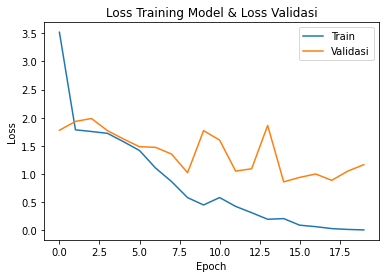

In [ ]:
# dengan visualisasi hasil per epoch-nya, kita bisa lihat  apakah data kita overfit atau engga
# idealnya, training dan validasi ini selisihnya ga boleh terlalu banyak
# kalo loss semakin kecil semakin bagus
# kalo akurasi semakin besar semakin bagus

from matplotlib import pyplot
from matplotlib import pyplot

pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('Loss Training Model & Loss Validasi')
pyplot.ylabel('Loss')
pyplot.xlabel('Epoch')
pyplot.legend(['Train', 'Validasi'], loc='upper right')
pyplot.show()

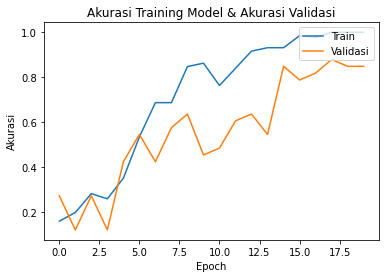

In [ ]:
# Membentuk grafiks evaluasi Akurasi dari pelatihan

pyplot.plot(history.history['accuracy'])
pyplot.plot(history.history['val_accuracy'])
pyplot.title('Akurasi Training Model & Akurasi Validasi')
pyplot.ylabel('Akurasi')
pyplot.xlabel('Epoch')
pyplot.legend(['Train', 'Validasi'], loc='upper right')
pyplot.show()

## 4. Test the Model

### Take sample test data

original label for the data is : 1


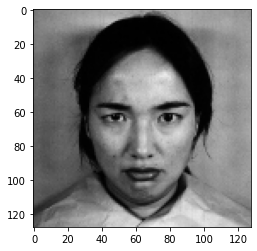

In [ ]:
# Ngetest datanya. kalau di penelitian, kalian akan aplikasiin ini ke GUI/Web gitu
# jadi kalau di sini kan kita define dulu image mana yang mau di-cek, di situ usernya yang masukkin imagenya sendiri

# select i-th image as sample
i = 2
sample_image = x_test[i:i+1]

# you can  print the original label for the image 
print(f"original label for the data is : {y_test[i]}")

# or plot the image to validate
plt.imshow(sample_image[0]);

In [ ]:
# if you are unsure of the label, use this function to see what the label belongs to 
getlabel(1)

'ANGRY'

Kira kira gitu! semangat bikinnya! boleh buat pre processing juga kalau mau nyoba2. bisa grayscaling, crop, turunin ukuran pixelnya.